
Feature engineering is the process of transforming raw data into a format that is more suitable for machine learning models. It involves creating new features or modifying existing ones to improve the performance of a machine learning algorithm. Effective feature engineering can significantly enhance a model's ability to find patterns, make predictions, and generalize well to new, unseen data.

Here are some common techniques and considerations in feature engineering:

Missing Values Handling: Address missing values by imputing them with the mean, median, or using more advanced imputation techniques.

Encoding Categorical Variables: Convert categorical variables into a numerical format, often using techniques like one-hot encoding or label encoding, so that they can be used in mathematical models.

Scaling and Normalization: Standardize or normalize numerical features to ensure that all variables contribute equally to the model. Common methods include Min-Max scaling or Z-score normalization.

Creating Interaction Terms: Combine two or more features to create new features that capture interactions between them. This can provide the model with additional information.

Polynomial Features: Introduce polynomial features to capture non-linear relationships in the data. This involves squaring, cubing, or raising features to higher powers.

Datetime Features: Extract relevant information from datetime variables, such as day of the week, month, or year, to provide the model with temporal patterns.

Binning or Discretization: Convert continuous variables into categorical ones by binning or discretizing them. This can help capture non-linear relationships and patterns.

Feature Scaling: Standardize or normalize numerical features to ensure that all variables contribute equally to the model. Common methods include Min-Max scaling or Z-score normalization.

Feature Selection: Identify and keep only the most relevant features to reduce dimensionality and prevent overfitting. Techniques include univariate feature selection, recursive feature elimination, and feature importance from tree-based models.

Domain-Specific Features: Incorporate domain knowledge to create features that are meaningful and relevant to the problem at hand.

In [182]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df_inflation = pd.read_csv('inflation.csv')
# df_inflation_2 = pd.read_csv('Inflation[1].csv') # this is a duplicate.
df_population = pd.read_csv('world_population.csv')
df_happyselfrep = pd.read_csv('share-of-people-who-say-they-are-happy.csv')

# I could not import CLASS.csv so I reviewed it in an email preview instead. It seems irrelevant so I won't add it to my dataframes.

In [184]:
df_inflation.head(10)
# Inflation 2022 might be useful to add to our df_combined dataframe because higher inflation tends to reflect poorer economic circumstances and we know that economic circumstances have a big impact
# on happiness in a population. 
# Inflation is normally reported as a percentage. 

,Countries,"Inflation, 2022",Global rank,Available data
0,Sudan,138.8,1,1960 - 2022
1,Zimbabwe,104.7,2,2010 - 2022
2,Turkey,72.3,3,1960 - 2022
3,Suriname,52.4,4,1960 - 2022
4,Sri Lanka,49.7,5,1960 - 2022
5,Haiti,34.0,6,1960 - 2022
6,Ghana,31.3,7,1965 - 2022
7,Moldova,28.7,8,1992 - 2022
8,Sierra Leone,27.2,9,2007 - 2022
9,Laos,23.0,10,1989 - 2022


In [185]:
df_population.head(10)
# Nothing here looks particularly useful for predicting happiness except maybe growth rate and population density. 

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


In [186]:
df_happyselfrep.head(10)

,Entity,Code,Year,Share of people who are happy (World Value Survey 2014)
0,Albania,ALB,1998,33.433434
1,Albania,ALB,2004,58.799999
2,Algeria,DZA,2004,80.733231
3,Algeria,DZA,2014,79.894180
4,Andorra,AND,2009,92.878632
5,Argentina,ARG,1984,78.571426
6,Argentina,ARG,1993,76.347305
7,Argentina,ARG,1998,81.742355
8,Argentina,ARG,2004,81.093750
9,Argentina,ARG,2009,86.072144


In [187]:
df_inflation.shape
# I will seek to add inflation from df_inflation because inflation and economy go hand-in-hand and we know economy is a good predictor for happiness scores, 
# but it doesn't match the scale of our combined dataframe from before so concatenating it will make a lot of nulls. 

(148, 4)

In [188]:
df_happyselfrep.shape
# Self-report is very variable in how useful it is as a measurement, because any kind of self-report measure requires that people have the introspective capability to reflect on their situation and
# provide an answer that is both accurate and truthful. Not everyone is very good at this! Even then, it's from 2014 and the world has changed a lot since then so why is this of any use?

(237, 4)

In [189]:
df_population.shape

# Growth rate is potentially useful because happier and safer societies tend to have higher birth rates which would result in population growth. But then, pop growth can strain resources,
# social cohesion, and put pressure on infrastructure which then would make everyone grumpy!

# Population density might be useful too. Factors such as congestion, limited personal space, and increased competition for resources in densely populated areas 
# can contribute to stress and potentially lower reported well-being. On the other hand, certain densely populated areas, especially in urban environments, may offer 
# greater access to amenities, job opportunities, and cultural activities, which can positively impact overall happiness. 

(234, 17)

In [190]:
df_combined = pd.read_csv('combined_happiness_complete.csv') # Imported from the UML Project workbook.
df_scaled = pd.read_csv('scaled_combined_happiness.csv')

print(f'Raw Shape: ', df_combined.shape)
print(f'Scaled Shape: ', df_scaled.shape)
# Scaled DF has an extra column due to clustering. 

Raw Shape:  (766, 9)
Scaled Shape:  (766, 10)


In [191]:
df_combined.head(10)

,Unnamed: 0,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,6,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,7,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,8,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,9,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [192]:
df_combined['Pop Growth'] = df_population['Growth Rate']
df_combined['Pop Density'] = df_population['Density (per km²)'] # not including pop area because of collinearity concern with density
df_combined['Inflation%'] = df_inflation['Inflation, 2022']
df_combined.head(5)

,Unnamed: 0,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Pop Growth,Pop Density,Inflation%
0,0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1.0257,63.0587,138.8
1,1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.9957,98.8702,104.7
2,2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1.0164,18.8531,72.3
3,3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.9831,222.4774,52.4
4,4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1.0100,170.5641,49.7


In [193]:
df_combined.isnull().sum()

Unnamed: 0             0
Happiness Score        0
Economy                0
Family                 0
Health                 0
Freedom                0
Trust                  0
Generosity             0
Dystopia Residual      0
Pop Growth           532
Pop Density          532
Inflation%           618
dtype: int64

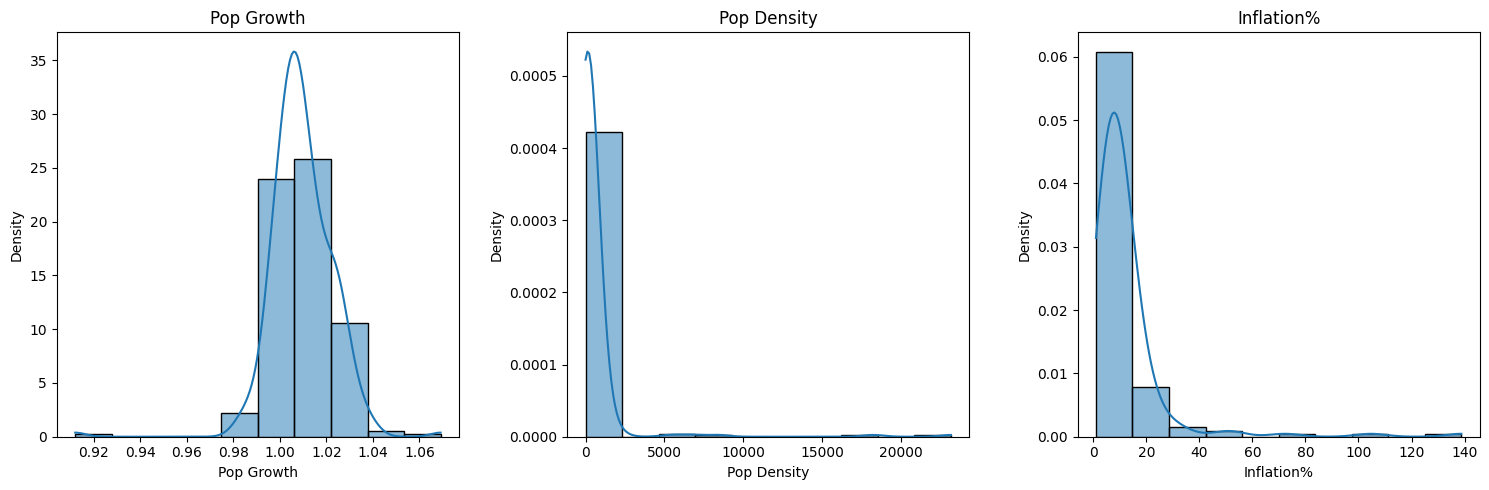

In [194]:
columns_to_plot = df_combined[['Pop Growth', 'Pop Density', 'Inflation%']]

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # written with 3 histograms in mind so 1 row and 3 columns. 

# Neat way I found online to plot multiple histograms at once.
for i, column in enumerate(columns_to_plot): # This is a loop that iterates through each column in the columns_to_plot DataFrame. i is the index.
    sns.histplot(df_combined[column], kde=True, ax=axes[i], bins=10, stat='density')
    axes[i].set_title(column) # does the title for me automatically
plt.tight_layout()
plt.show()

In [195]:
# Quick check for collinearity
df_combined[['Pop Growth', 'Pop Density', 'Inflation%']].corr()
# I'm satisfied there's no worry about that here based on the below output (very weak correlations).

,Pop Growth,Pop Density,Inflation%
Pop Growth,1.000000,-0.069753,-0.021897
Pop Density,-0.069753,1.000000,-0.066264
Inflation%,-0.021897,-0.066264,1.000000


In [196]:
# All three of these added dataframes are skewed so if I decide to impute, it'll be median imputation. 
# But I will be imputing the majority of their values in this instance since they each have 500+ nulls... this isn't a deal-breaker as far as I know but it's a bugger. I think this means these three columns won't be very useful
# for adding to my dataset to improve the regression model but I guess I'll find out later.

# holy moly there's a simple imputer in Sklearn! I no longer have to do each one manually!
from sklearn.impute import SimpleImputer

# Select only the columns to impute
columns_to_impute = ['Pop Growth', 'Pop Density', 'Inflation%']

# Create a DataFrame with the selected columns and start the imputer, I find this helps me avoid key errors. 
df_to_impute = df_combined[columns_to_impute] 
imputer = SimpleImputer(strategy='median')

# Fit and transform those columns
df_combined[columns_to_impute] = imputer.fit_transform(df_to_impute)

In [197]:
df_combined.head(10)

,Unnamed: 0,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Pop Growth,Pop Density,Inflation%
0,0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1.0257,63.0587,138.8
1,1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0.9957,98.8702,104.7
2,2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1.0164,18.8531,72.3
3,3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0.9831,222.4774,52.4
4,4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1.0100,170.5641,49.7
5,5,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,1.0315,28.5466,34.0
6,6,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,1.0066,174.2527,31.3
7,7,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,1.0058,212.1335,28.7
8,8,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,1.0052,16.3683,27.2
9,9,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,0.9962,93.4831,23.0


In [198]:
df_combined.drop(['Unnamed: 0'], axis=1, inplace=True) # Spotted this and assumed it's just an anomaly from merging dfs because it looks like an index column. 
df_combined.isnull().sum()

Happiness Score      0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
Pop Growth           0
Pop Density          0
Inflation%           0
dtype: int64

In [199]:
df_combined.describe()

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Pop Growth,Pop Density,Inflation%
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,5.388159,0.917607,1.081808,0.614499,0.412272,0.150388,0.192989,2.091384,1.008412,204.337075,8.984465
std,1.121952,0.403644,0.325595,0.247250,0.151015,0.123216,0.120424,0.439951,0.007427,1152.054972,7.108515
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,0.912000,0.026100,1.000000
25%,4.513250,0.611255,0.871152,0.443000,0.310670,0.061000,0.100265,1.969115,1.007900,95.346750,8.300000
50%,5.322000,0.984000,1.125000,0.650166,0.430770,0.109000,0.177500,2.091384,1.007900,95.346750,8.300000
75%,6.189500,1.236187,1.330713,0.808868,0.531165,0.205954,0.258587,2.204763,1.007900,95.346750,8.300000
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.819710,3.837720,1.069100,23172.266700,138.800000


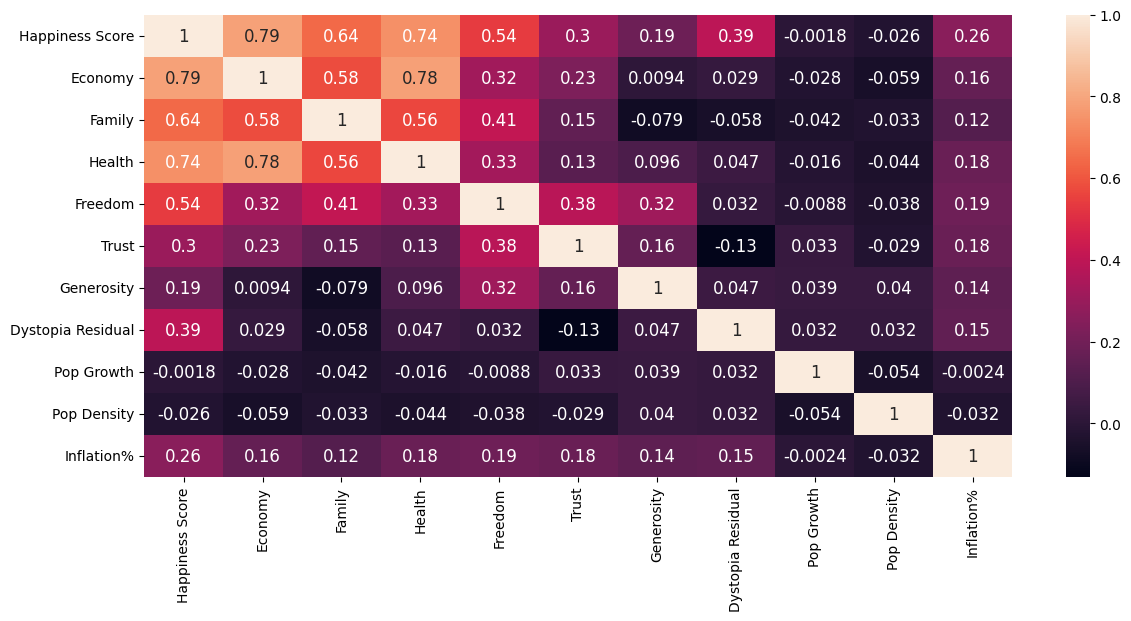

In [200]:
float_cols = df_combined.select_dtypes(include=["float64"])
corr_matrix = float_cols.corr()
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(corr_matrix, annot=True, annot_kws={'fontsize': 12})
plt.show()

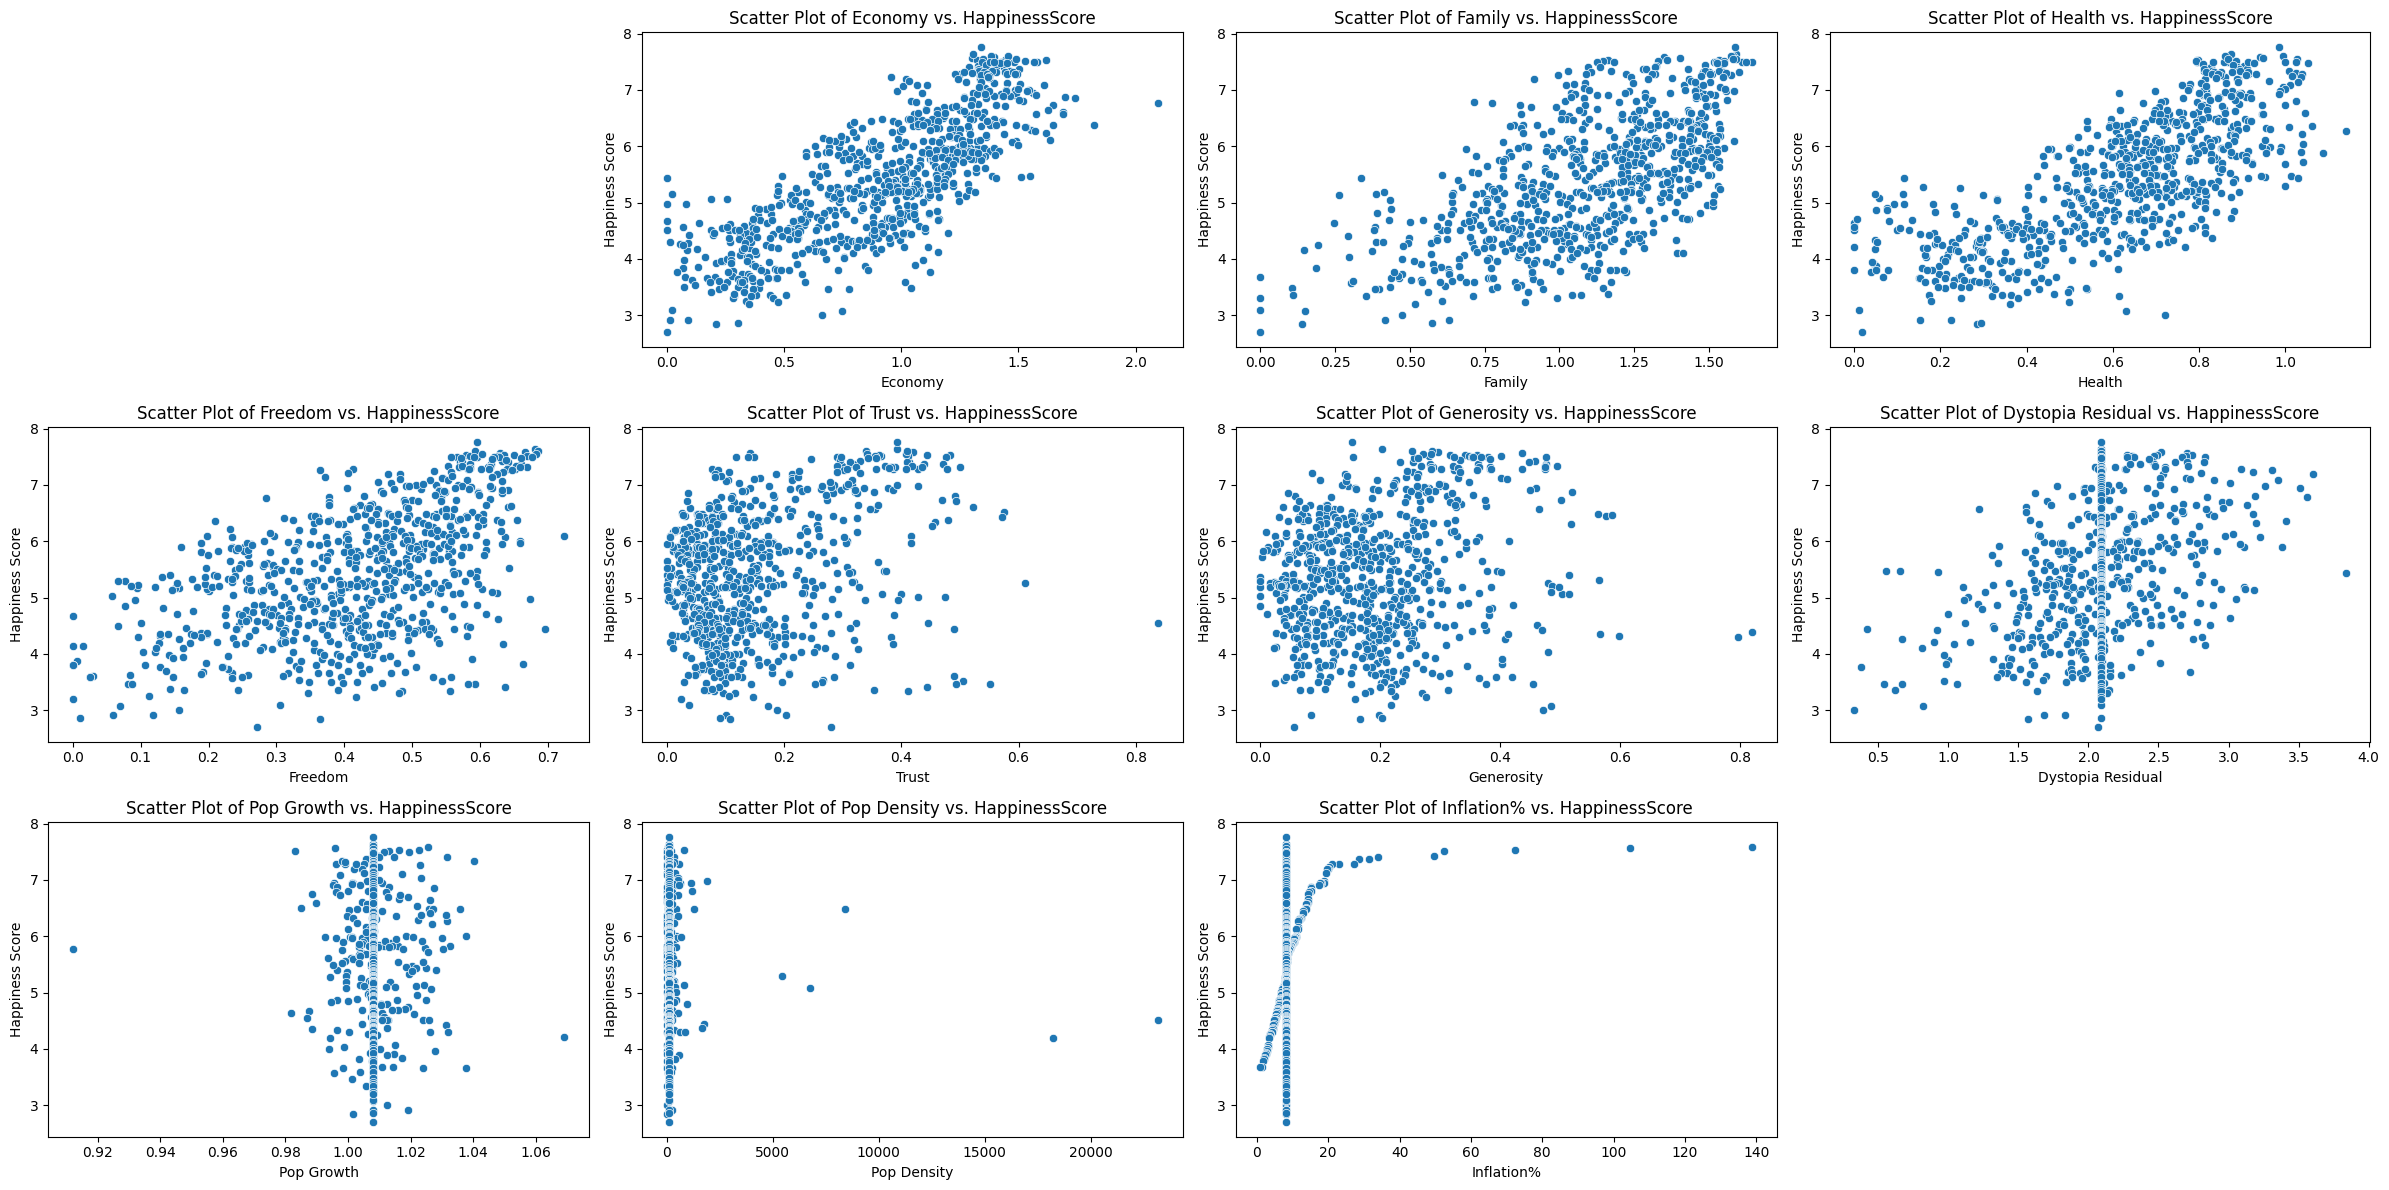

In [201]:
features = df_combined.columns

fig, axes = plt.subplots(3, 4, figsize=(24, 12))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot each feature against Happiness Score in separate subplots
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='Happiness Score', data=df_combined, ax=axes[i], alpha=1) # alpha here just makes the plotted dots more opaque.
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Happiness Score')
    axes[i].set_title(f'Scatter Plot of {feature} vs. HappinessScore')

# Remove the first and last subplots because the first is Happiness Score with Happiness Score and the last one is empty.
fig.delaxes(axes[0])
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

Some graphs show linear relationships, other relationships seem less linear. I can also clearly see in the last 4 where I did imputation, oh dear!

In [202]:
# Let's plug it into a regression and see what happens! # 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df_combined.drop(['Happiness Score'], axis=1) 
y = df_combined['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_test = model_1.predict(X_test)

mse_1 = mean_squared_error(y_test, y_pred_test)
r2_1 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse_1}")
print(f"R-squared: {r2_1}")

Mean Squared Error: 0.11214212551464213
R-squared: 0.9149450584839233


In [203]:
# Going to use a grid search to find the best parameters for MSE instead of just testing them all individually. #
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = df_combined.drop(['Happiness Score'], axis=1) 
y = df_combined['Happiness Score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()}

# Telling GS what models we want it to test0. ^ These are the ones I tried in the previous workbook. I did try SVR too but the kernel spent 20+ minutes running the code so I removed it.

parameters = {
    'Linear Regression': {'fit_intercept': [True, False], 'positive': [True, False]},
    'Ridge Regression': {'alpha': [0.01, 0.05, 1]},
    'Lasso Regression': {'alpha': [0.01, 0.05, 1]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}}

# The above identifies the desired hyperparameters for each model we test using grid search. I've selected the parameters based on previous examples and works.
# Note: 'epsilon' in SVR = a regularization parameter that determines the width of the margin around the regression line. It is part of the ε-insensitive loss function used in SVR. 
# The loss function allows for a certain amount of error or deviation (ε) between the predicted and actual values without penalty. 'C' defines regularization strength. 

results = {}  # Collating the results for each model.
for model_name, model in models.items():
    grid_search = GridSearchCV(model, parameters[model_name], cv=5, scoring='neg_mean_squared_error')  # optimized for MSE with 5 folds.
    grid_search.fit(X_train, y_train)
    results[model_name] = {'Optimal Parameters': grid_search.best_params_, 'Best MSE': -grid_search.best_score_,'Best R-squared': grid_search.best_estimator_.score(X_test, y_test)}

for model, result in results.items():  # printing the result for each model.
    print(f"{model}: Optimal Parameters = {result['Optimal Parameters']}")
    print(f"{model}: Best MSE = {result['Best MSE']}")
    print(f"{model}: Best R-squared = {result['Best R-squared']}")

Linear Regression: Optimal Parameters = {'fit_intercept': False, 'positive': True}
Linear Regression: Best MSE = 0.1155711812506238
Linear Regression: Best R-squared = 0.915016789116095
Ridge Regression: Optimal Parameters = {'alpha': 0.01}
Ridge Regression: Best MSE = 0.11564988550571653
Ridge Regression: Best R-squared = 0.9149636031263916
Lasso Regression: Optimal Parameters = {'alpha': 0.01}
Lasso Regression: Best MSE = 0.13280920804910712
Lasso Regression: Best R-squared = 0.9001581218671953
Random Forest: Optimal Parameters = {'n_estimators': 200}
Random Forest: Best MSE = 0.16388601053772717
Random Forest: Best R-squared = 0.8840921088785869
Gradient Boosting: Optimal Parameters = {'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting: Best MSE = 0.14229177583114588
Gradient Boosting: Best R-squared = 0.9004452597444494


In [204]:
# Retesting Linear Regression with Optimizations from Grid Search to double-check its output #

X = df_combined.drop(['Happiness Score'], axis=1) 
y = df_combined['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

model_2 = LinearRegression(fit_intercept = False, positive = True)
model_2.fit(X_train, y_train)
y_pred_test_2 = model_2.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred_test_2)
r2_2 = r2_score(y_test, y_pred_test_2)

print(f"Optimized Mean Squared Error: {mse_2}")
print(f"Optimized R-squared: {r2_2}")
print(f"Original Mean Squared Error: {mse_1}")
print(f"Original R-squared: {r2_1}")

Optimized Mean Squared Error: 0.11204755105003306
Optimized R-squared: 0.915016789116095
Original Mean Squared Error: 0.11214212551464213
Original R-squared: 0.9149450584839233


So the outputs for my optimized MLR are:

R^2 = 91.49%
MSE = 0.1120

Pretty good model, how does it compare to the first df_combined dataframe from the UML workbook?

UML MLR:

R^2 = 91.74%
MSE = 0.0865

The new dataframe with the 3 added features has a small decrease in both R^2 and MSE. The decrease in MSE is a positive outcome but the decrease in R^2 is negative because the new model can't explain as much of the variance in happiness score vs the original model. What if I try scaling the new one and re-running the analysis?

In [205]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
df_scaled_2 = scaler.fit_transform(df_combined) # Standardizing the data in the current dataframe.
k_means_model = KMeans(n_clusters=3) # Data split into two clusters, will edit following elbow plot later on. Edited to 3. 
k_means_model.fit(df_scaled_2) # fit the k-means model to the standardized data 
cluster_labels = k_means_model.predict(df_scaled_2) # the predict method is applied to the standardized dataframe which assigns each data point to a cluster. 

C:\Users\olive\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [206]:
df_scaled_2 = pd.DataFrame(df_scaled_2, columns=['Happiness Score', 'Economy', 'Family', 'Health', 'Freedom', 'Trust','Generosity', 'Dystopia Residual', 'Pop Growth', 'Pop Density', 'Inflation%'])
df_scaled_2['Cluster'] = cluster_labels # Adding new column for cluster to the DF.

In [207]:
df_scaled_2['Cluster'].value_counts()

Cluster
0    388
1    255
2    123
Name: count, dtype: int64

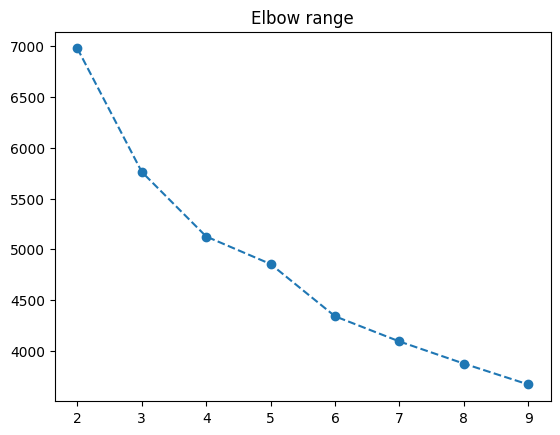

In [208]:
ssd = [] # sum of squared distances 

for k in range(2,10):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_scaled_2)
    ssd.append(model.inertia_) # cluster center
    

# ssd.append = appends the sum of squared distances for the fitted model to the ssd list. 
# The inertia_ attribute of the k-means model represents the sum of squared distances of samples to their closest cluster center.

plt.plot(range(2,10), ssd, "o--") # chose 2 clusters to 12 clusters as range because clusters = 3, 12 was arbitrary.
# The "o--" format specifies that the points will be marked with circles and connected with a dashed line.
plt.title("Elbow range")
plt.show()

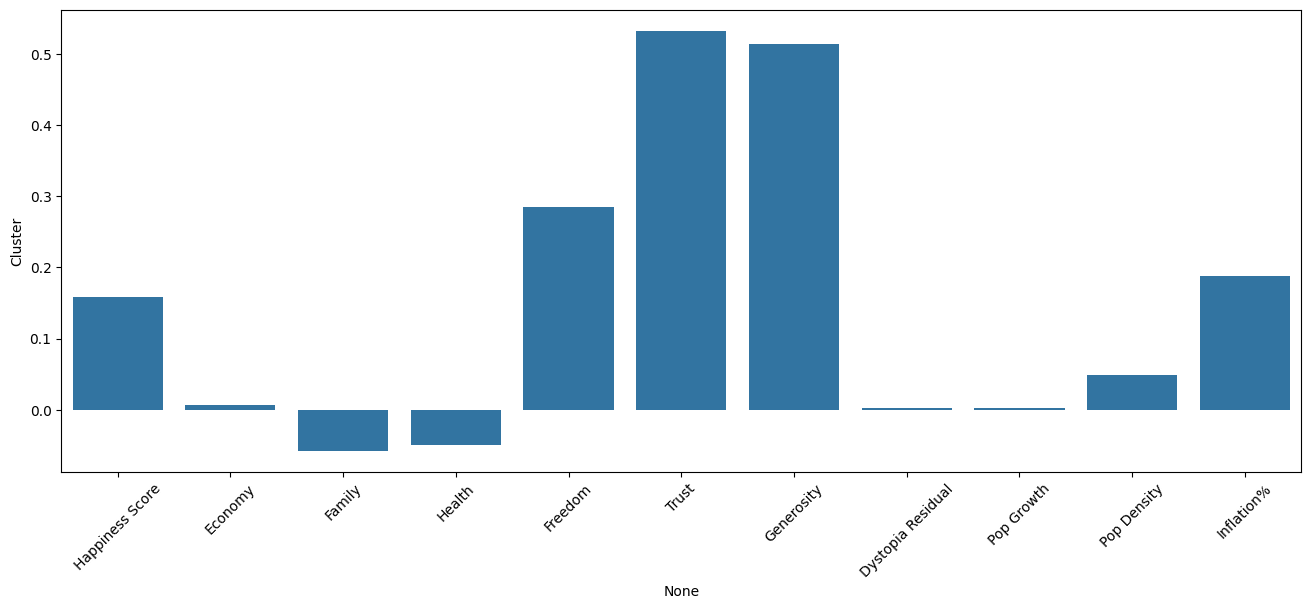

In [209]:
# Using Seaborn to plot correlations between features and clusters.
plt.figure(figsize=(16, 6))
sns.barplot(x=df_scaled_2.corr()['Cluster'].index[:-1], y=df_scaled_2.corr()['Cluster'].iloc[:-1])
plt.xticks(rotation=45)
plt.show()

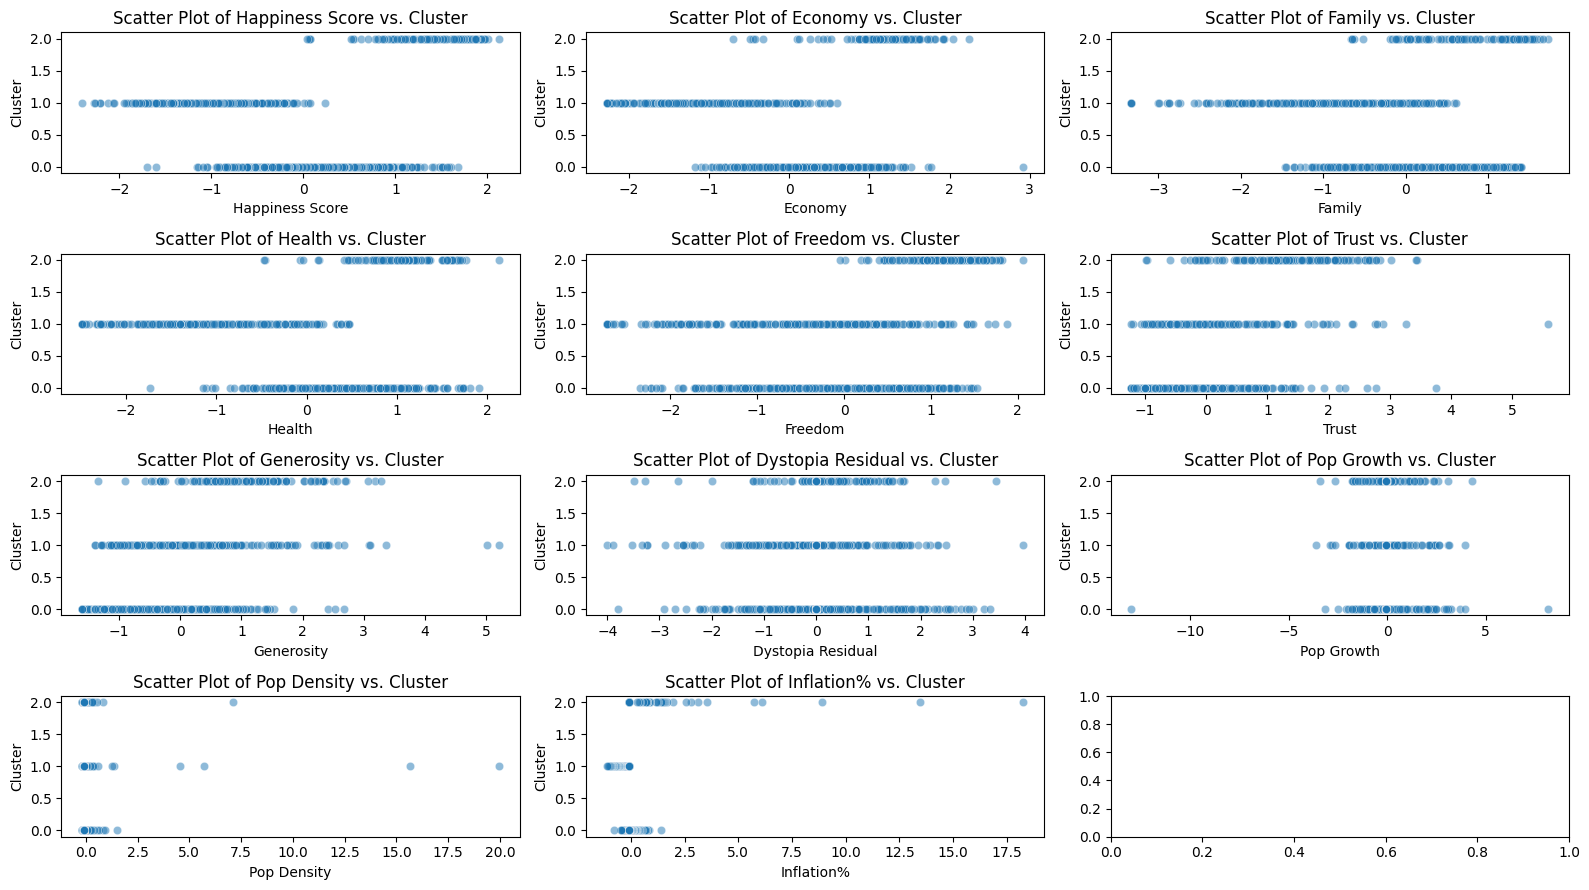

In [210]:
# The added features Pop Growth, Pop Density, and Inflation% are weakly correlated with their cluster assignment, meaning the variation in these features does not align well with the patterns found by the clustering algorithm. 
# In a nutshell, this means they don't contribute much to separating data points into clusters and may not provide much benefit to the model.
# Alternatively, the relationship between these and 'Cluster' may instead be non-linear, so let's check that first. 

features = df_scaled_2.columns[:-1]  # Excludes the 'Cluster' column at the end of the df

fig, axes = plt.subplots(4, 3, figsize=(16, 9))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Plot each feature against the 'Cluster' in separate subplots
for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='Cluster', data=df_scaled_2, ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Cluster')
    axes[i].set_title(f'Scatter Plot of {feature} vs. Cluster')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [211]:
# It looks like most of my features don't have linear relationships with their cluster label, except maybe for family and economy.  
# The above graphs also tell me that my inclusion and imputation of Pop Density has not worked well to incorporate it into my dataframe, because it's not discriminating well between different clusters at all. 
# I suspect this is due to the scale that Pop Density tends to operate on and median imputation has not worked well in this case. 
# I will now re-run the regression with the scaled data and afterwards I will try SVR too. 

X = df_scaled_2.drop(['Happiness Score'], axis=1) 
y = df_scaled_2['Happiness Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

model_3 = LinearRegression(fit_intercept = False, positive = True)
model_3.fit(X_train, y_train)
y_pred_test_3 = model_3.predict(X_test)

mse_3 = mean_squared_error(y_test, y_pred_test_3)
r2_3 = r2_score(y_test, y_pred_test_3)

print(f"Optimized Mean Squared Error: {mse_2}")
print(f"Optimized R-squared: {r2_2}")
print(f"Scaled Mean Squared Error: {mse_3}")
print(f"Scaled R-squared: {r2_3}")

Optimized Mean Squared Error: 0.11204755105003306
Optimized R-squared: 0.915016789116095
Scaled Mean Squared Error: 0.08875249204116738
Scaled R-squared: 0.9153761572438563


In [212]:
# The new scaled one represents a small decrease in R^2 and MSE, what if we use SVR? Not sure for my parameters so I'll ask grid search. 
from sklearn.metrics import make_scorer

X = df_scaled_2.drop('Happiness Score', axis=1) 
y = df_scaled_2['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

svr_model = SVR()
params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]}

# Specify scoring metrics
scoring_metrics = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': 'r2'}

grid_search_mse = GridSearchCV(estimator=svr_model, param_grid=params, scoring=scoring_metrics['mse'], cv=5)
grid_search_mse.fit(X_train, y_train)
grid_search_r2 = GridSearchCV(estimator=svr_model, param_grid=params, scoring=scoring_metrics['r2'], cv=5)
grid_search_r2.fit(X_train, y_train)

# Print the results for MSE
print("Grid Search Results for MSE:")
print(f"Optimal Hyperparameters: {grid_search_mse.best_params_}")
print(f"Best MSE: {-grid_search_mse.best_score_}")  # Negative because GridSearchCV minimizes the objective function

# Print the results for R^2
print("Grid Search Results for R-squared:")
print(f"Optimal Hyperparameters: {grid_search_r2.best_params_}")
print(f"Best R-squared: {grid_search_r2.best_score_}")

Grid Search Results for MSE:
Optimal Hyperparameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Best MSE: 0.09153377348585783
Grid Search Results for R-squared:
Optimal Hyperparameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Best R-squared: 0.9046256537361088


C controls regularization strength between test and train errors. 
Epsilon in Support Vector Regression (SVR) defines the margin of tolerance around the predicted values, allowing deviations within this margin to be considered acceptable without incurring a penalty in the loss function."

SVR MSE = 0.0925
SVR R^2 = 90.35%

Scaled New DF MSE = 0.0891
Scaled New DF R^2 = 91.49%

UML Original R^2 = 91.74%
UML Original MSE = 0.0865

Overall, the original scaled model from my UML workbook still performs the best, meaning that adding the three features here (Pop Growth, Pop Density, Inflation%) did not add anything to the model's ability to predict happiness score. This may however be due to how I added them into my dataframe and how I imputed the nulls, meaning my feature engineering was poor, or it may be that these three features do not affect happiness very much at all. 
